In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.multivariate.manova import MANOVA


In [2]:
DATA_PATH = "../Data/processed/acc_features.csv"
acc_features = pd.read_csv(DATA_PATH)

print("Loaded acc_features shape:", acc_features.shape)
acc_features.head()


Loaded acc_features shape: (2913, 12)


,subject_id,activity,ax_std,ay_std,az_std,ax_rms,ay_rms,az_rms,sma,ax_energy,ay_energy,az_energy
0,s12,run,0.869638,0.956757,1.062938,0.869656,0.957057,1.063297,2.305827,0.756302,0.915958,1.130601
1,s12,sit,0.010238,0.012713,0.014374,0.010239,0.012715,0.014375,0.029978,0.000105,0.000162,0.000207
2,s12,sit,0.009752,0.012608,0.013975,0.009753,0.012610,0.013983,0.028985,0.000095,0.000159,0.000196
3,s12,sit,0.009429,0.011982,0.014114,0.009439,0.011991,0.014128,0.028197,0.000089,0.000144,0.000200
4,s12,walk,0.727310,0.623480,0.862876,0.729464,0.628300,0.862940,1.748904,0.532117,0.394761,0.744666


In [3]:
acc_features["activity"].value_counts()


activity
run     972
sit     972
walk    969
Name: count, dtype: int64

In [4]:
#Descriptive Statistics
desc_stats = acc_features.groupby("activity").mean(numeric_only=True)
desc_stats


,ax_std,ay_std,az_std,ax_rms,ay_rms,az_rms,sma,ax_energy,ay_energy,az_energy
activity,,,,,,,,,,
run,0.952458,1.897004,1.531457,0.953262,1.897956,1.532075,3.547312,0.965951,4.071374,2.794605
sit,0.021894,0.026389,0.024028,0.021900,0.026416,0.024035,0.054357,0.000623,0.001040,0.000737
walk,0.750578,0.921184,1.015281,0.751262,0.921786,1.015998,2.143315,0.628763,0.992630,1.231721


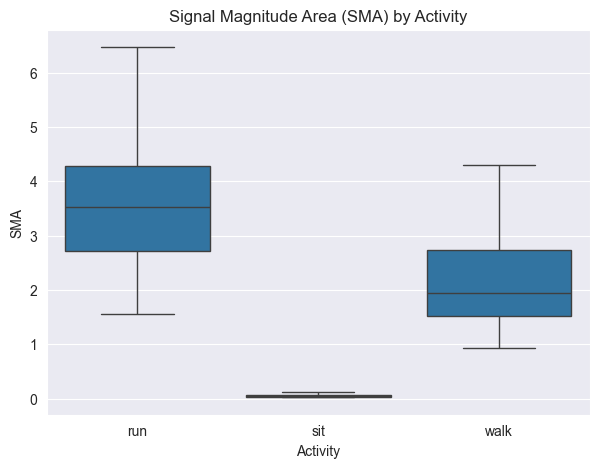

In [5]:
#sma

plt.figure(figsize=(7,5))
sns.boxplot(data=acc_features, x="activity", y="sma", showfliers=False)
plt.title("Signal Magnitude Area (SMA) by Activity")
plt.xlabel("Activity")
plt.ylabel("SMA")
plt.show()


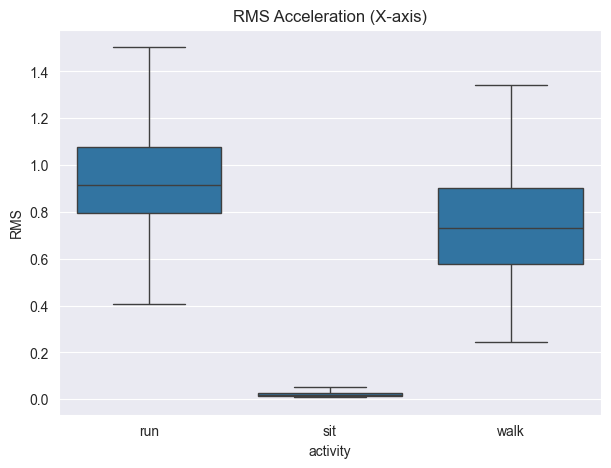

In [6]:
#rms

plt.figure(figsize=(7,5))
sns.boxplot(data=acc_features, x="activity", y="ax_rms", showfliers=False)
plt.title("RMS Acceleration (X-axis)")
plt.ylabel("RMS")
plt.show()


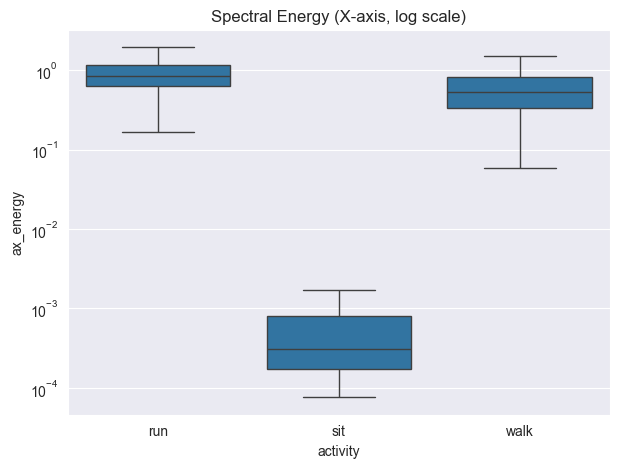

In [7]:
# energy visualization
plt.figure(figsize=(7,5))
sns.boxplot(
    data=acc_features,
    x="activity",
    y="ax_energy",
    showfliers=False
)
plt.yscale("log")
plt.title("Spectral Energy (X-axis, log scale)")
plt.show()


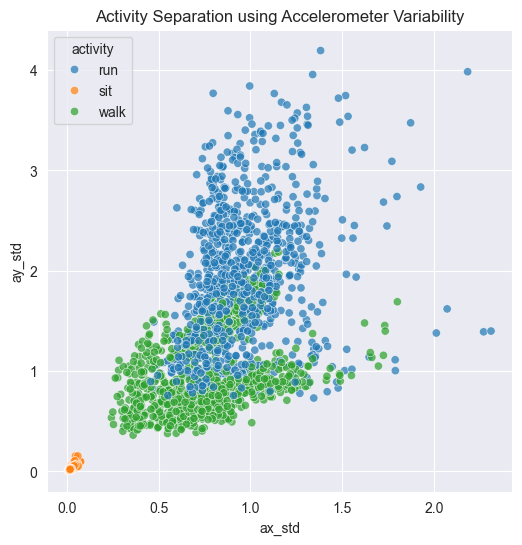

In [8]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=acc_features,
    x="ax_std",
    y="ay_std",
    hue="activity",
    alpha=0.7
)
plt.title("Activity Separation using Accelerometer Variability")
plt.show()


In [9]:
#MANOVA
manova_features = acc_features[
    ["ax_std", "ay_std", "az_std", "sma", "ax_energy"]
]

manova_df = pd.concat(
    [manova_features, acc_features["activity"]],
    axis=1
)



In [10]:
from statsmodels.multivariate.manova import MANOVA

maov = MANOVA.from_formula(
    "ax_std + ay_std + az_std + sma + ax_energy ~ activity",
    data=manova_df
)

print(maov.mv_test())


                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
        Intercept         Value  Num DF   Den DF   F Value   Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.0289 5.0000 2906.0000 19534.0948 0.0000
          Pillai's trace  0.9711 5.0000 2906.0000 19534.0948 0.0000
  Hotelling-Lawley trace 33.6099 5.0000 2906.0000 19534.0948 0.0000
     Roy's greatest root 33.6099 5.0000 2906.0000 19534.0948 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
        activity         Value   Num DF   Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda  0.0323 10.0000 5812.0000  2654.6826 0.0000
 

In [ ]:
#“MANOVA results indicate that physical activity has a statistically significant multivariate effect on accelerometer-derived features (Wilks’ λ = 0.046, p < 0.001), confirming strong separability between sit, walk, and run.”